In [1]:
import numpy as np
import os 
import pandas as pd
import string
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as pc
import seaborn as sns
import itertools
import matplotlib.cm as cm 
from matplotlib import colors

path = os.getcwd()

plt.rcParams.update({'axes.labelsize': 15, 'axes.titlesize': 15, 
              'legend.fontsize':13, 'font.family': ['sans-serif'] })

### Frecuencias de resonancia

In [2]:
df = pd.read_csv(path+"/Datos/MKID/Resonators(26.7mk).csv")

freq = df.iloc[:,0].tolist()
db = df.iloc[:,1].tolist()
phase = df.iloc[:,2].tolist()

res = np.array([1.109798,1.115582,1.160036,1.161309,1.170921,1.172203,1.183206,1.196807,1.209953,1.221539,1.267061,1.280456,1.297376,1.315369,1.354136,1.289147,1.436264,1.466333,1.856226,1.900270,1.904633,1.908044,1.908688,1.924087,1.954064,1.996159,2.016980,2.460095,2.785618,2.962039])*10**9


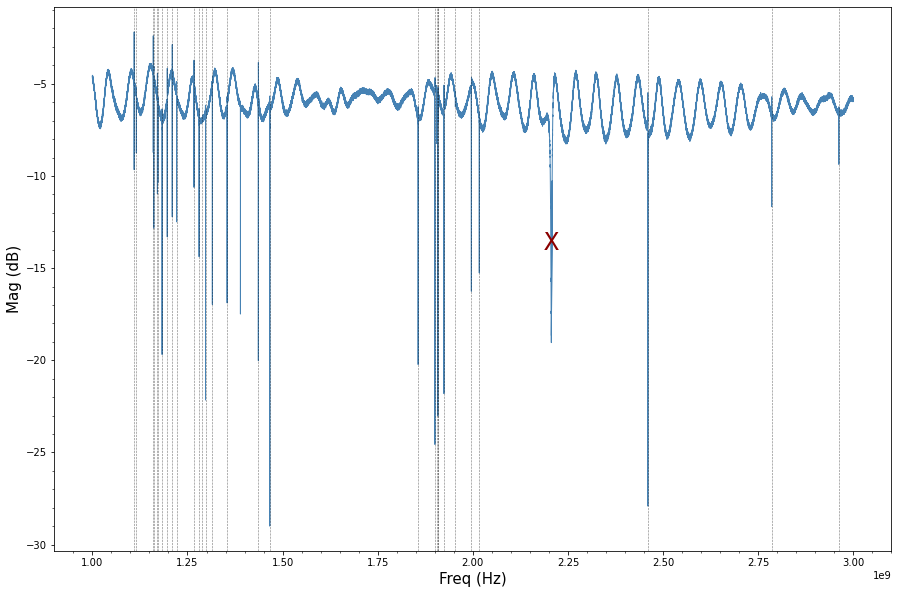

In [3]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=1)
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')

plt.text(2.1852e9,-13, 'X', 
         fontsize=25, color='darkred', fontfamily='monospace',
         verticalalignment ='top', horizontalalignment ='left')

[plt.axvline(res[i], color='k', alpha=0.5, linewidth=0.6, linestyle='--') for i in range(len(res))]

plt.show()

Calculamos las diferencias entre frecuencias para determinar cuales están más cercanas

In [3]:
diff = np.delete(np.array([res[i]-res[i-1] for i in range(len(res))]),0)


22 (res[21]) y 23 (res[22]) son los picos más pegados: 6.44e5 Hz de separación (644 KHz) 

Luego 3 y 4, y 5 y 6:  1.26e6 Hz y 1.28e6 Hz respectivamente

##### 3 y 4

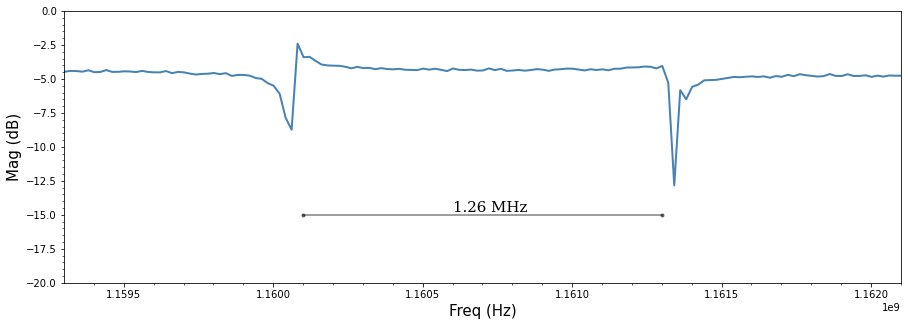

In [77]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')

plt.plot((1.1601e9,1.1613e9),(-15,-15), '.-',c='k',alpha=0.5 )
plt.text(1.1606e9,-14, '1.26 MHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.1593e9, 1.1621e9)
plt.ylim(-20,0)
plt.show()

##### 5 y 6

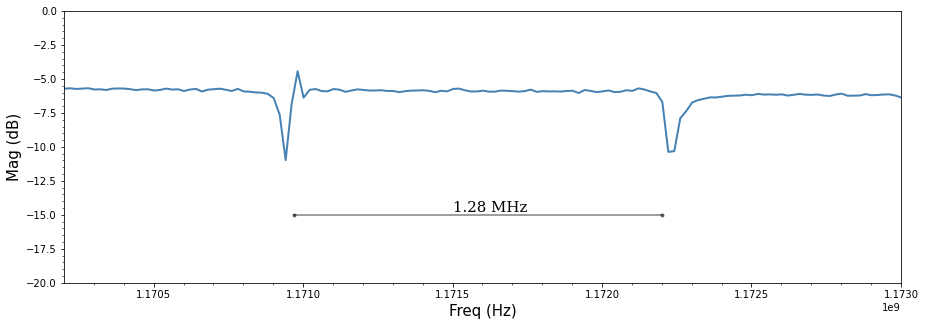

In [76]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')

plt.plot((1.17097e9,1.1722e9),(-15,-15), '.-',c='k',alpha=0.5 )
plt.text(1.1715e9,-14, '1.28 MHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.1702e9, 1.173e9)
plt.ylim(-20,0)
plt.show()

##### 22 y 23

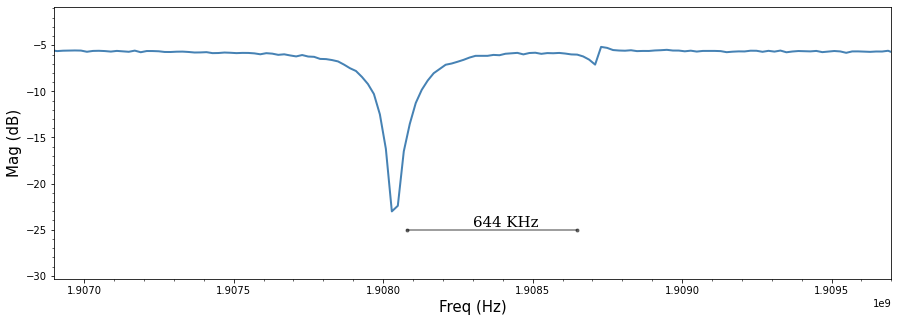

In [73]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')


plt.plot((1.90808e9,1.90865e9),(-25,-25), '.-',c='k',alpha=0.5 )
plt.text(1.9083e9,-23.5, '644 KHz', 
         fontsize=15, color='black', fontfamily='serif',
         verticalalignment ='top', horizontalalignment ='left')

plt.xlim(1.9069e9, 1.9097e9)
#plt.xlim(1.9075e9, 1.9091e9)
#plt.ylim(-20,0)
plt.show()

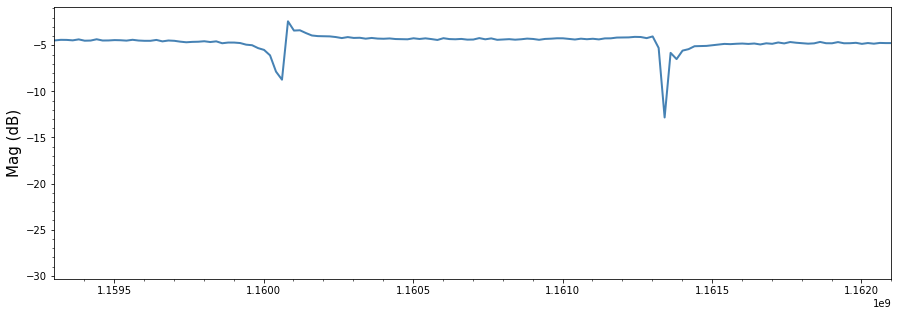

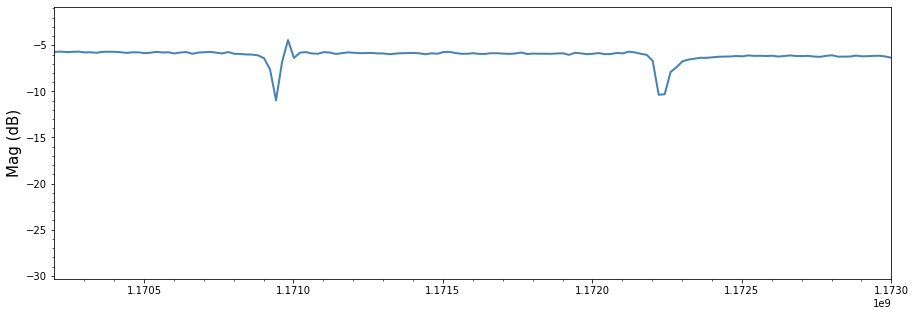

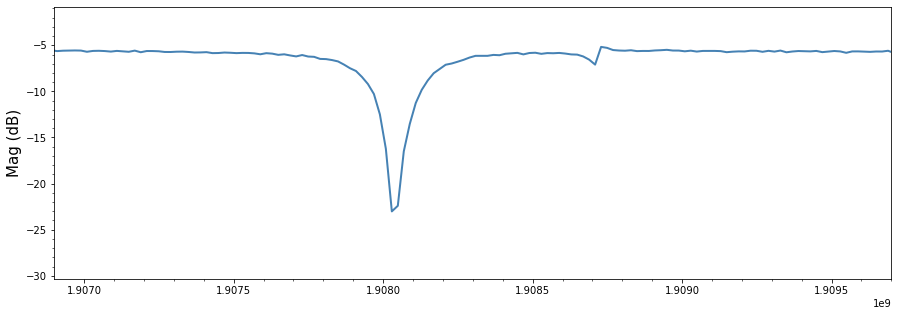

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.ylabel('Mag (dB)')
plt.xlim(1.1593e9, 1.1621e9)
plt.show()

###

fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.ylabel('Mag (dB)')
plt.xlim(1.1702e9, 1.173e9)
plt.show()

###

fig, ax = plt.subplots(figsize=(15, 5))

plt.plot(freq,db, color='steelblue', alpha=1, linewidth=2)
plt.minorticks_on()  
plt.ylabel('Mag (dB)')
plt.xlim(1.9069e9, 1.9097e9)
plt.show()

##### Distribución de la separación entre picos

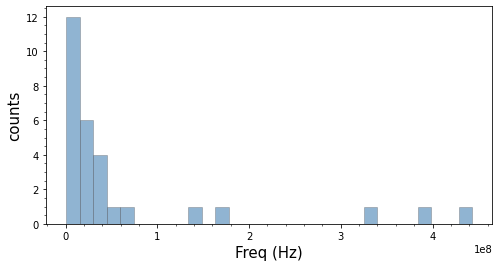

[6.44000e+05 1.27300e+06 1.28200e+06 3.41100e+06 4.36300e+06 5.78400e+06
 9.61200e+06 1.10030e+07 1.15860e+07 1.31460e+07 1.33950e+07 1.36010e+07
 1.53990e+07 1.69200e+07 1.79930e+07 2.08210e+07 2.99770e+07 3.00690e+07
 3.87670e+07 4.20950e+07 4.40440e+07 4.44540e+07 4.55220e+07 6.49890e+07
 1.47117e+08 1.76421e+08 3.25523e+08 3.89893e+08 4.43115e+08]


In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

plt.hist(np.abs(diff),30, alpha=0.6, color='steelblue',edgecolor=".3",linewidth=.5,)

plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('counts')
plt.show()

print(np.sort(np.abs(diff)))

### Potencia
 
Subida de atenuación para ver la relación señal-ruido y escoger lo óptimo

Text(0, 0.5, 'Mag (dB)')

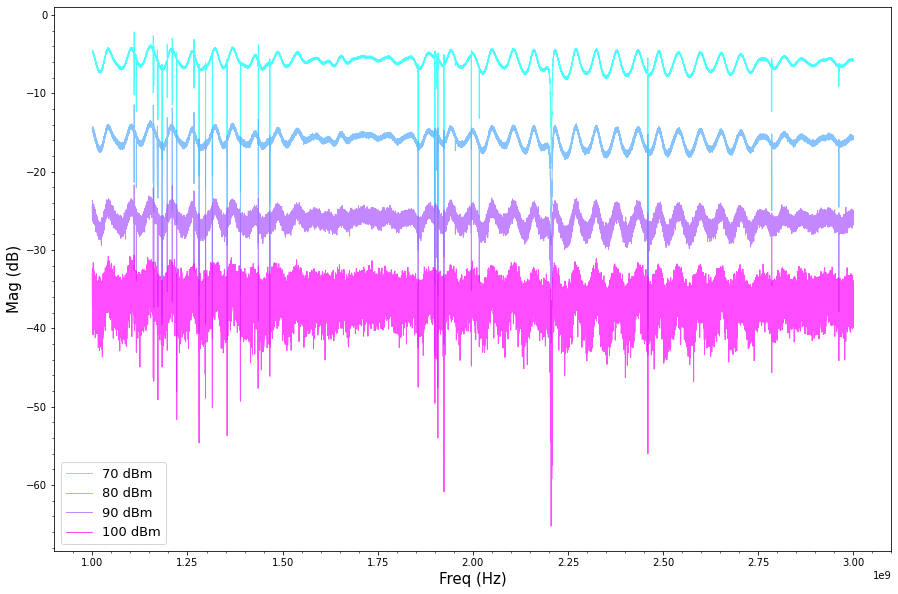

In [65]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['70 dBm', '80 dBm', '90 dBm', '100 dBm']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.7, linewidth=1, label=power[i], color=colores[i])
    
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   

La bajada de atenuación para observar el cambio en la amplitud y la frecuencia se observa en los picos de forma individual solo, porque se superpone:

##### Resonancia 28

(2459000000.0, 2461000000.0)

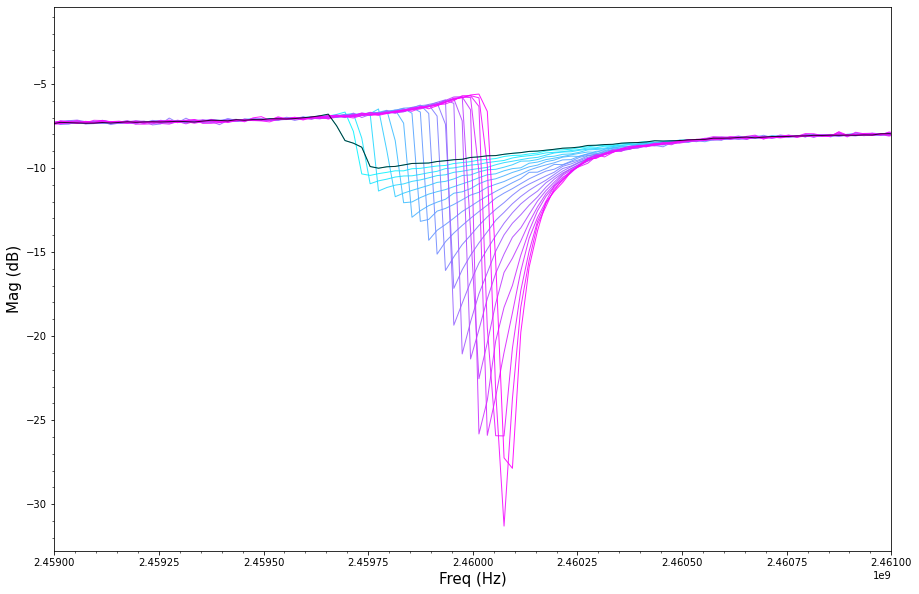

In [30]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")
power = ['50 dBm', '51 dBm', '52 dBm', '53 dBm', '54 dBm', '55 dBm', '56 dBm', 
         '57 dBm', '58 dBm', '59 dBm', '60 dBm', '61 dBm', '62 dBm', '63 dBm', 
         '64 dBm', '65 dBm', '66 dBm', '67 dBm', '68 dBm', '69 dBm', '70 dBm']

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1, label=power[i], color=colores[i])
    
    
df_file = pd.read_csv(files[0])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.8, linewidth=1, color='k')

#plt.legend() 
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(2.459e9, 2.461e9)
#plt.axvline(2.460095e9, color='k', alpha=0.7, linewidth=0.8, linestyle='--')

(2459000000.0, 2461000000.0)

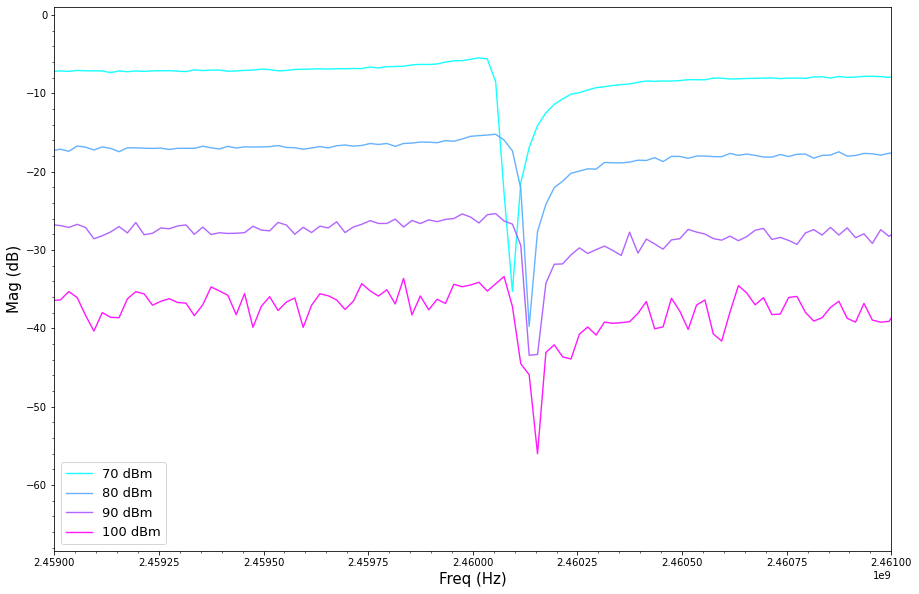

In [32]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['70 dBm', '80 dBm', '90 dBm', '100 dBm']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1.4, label=power[i], color=colores[i])
    
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(2.459e9, 2.461e9)


##### Resonancia 21

(-10.0, -4.0)

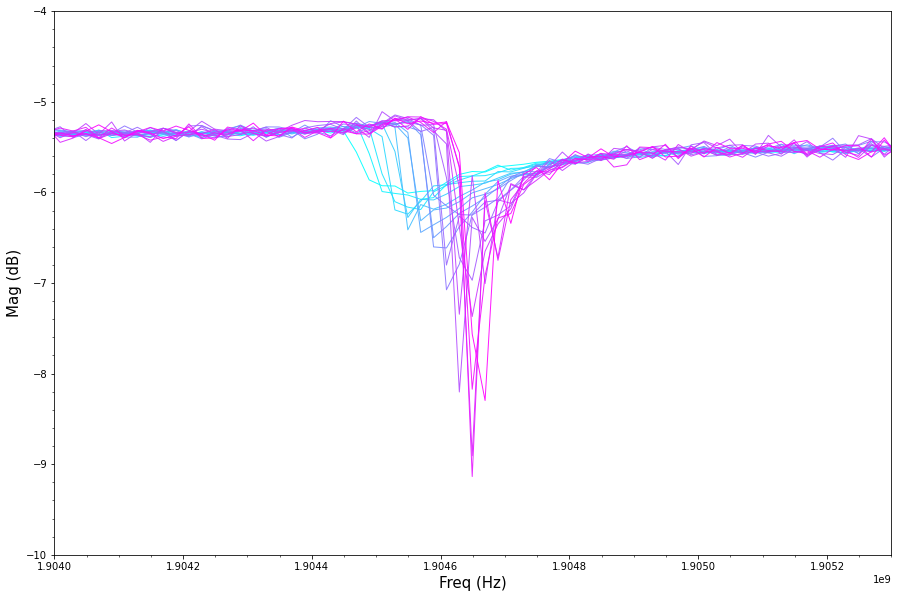

In [89]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1, color=colores[i])
    
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(1.904e9,1.9053e9)
plt.ylim(-10,-4)

(1904000000.0, 1905300000.0)

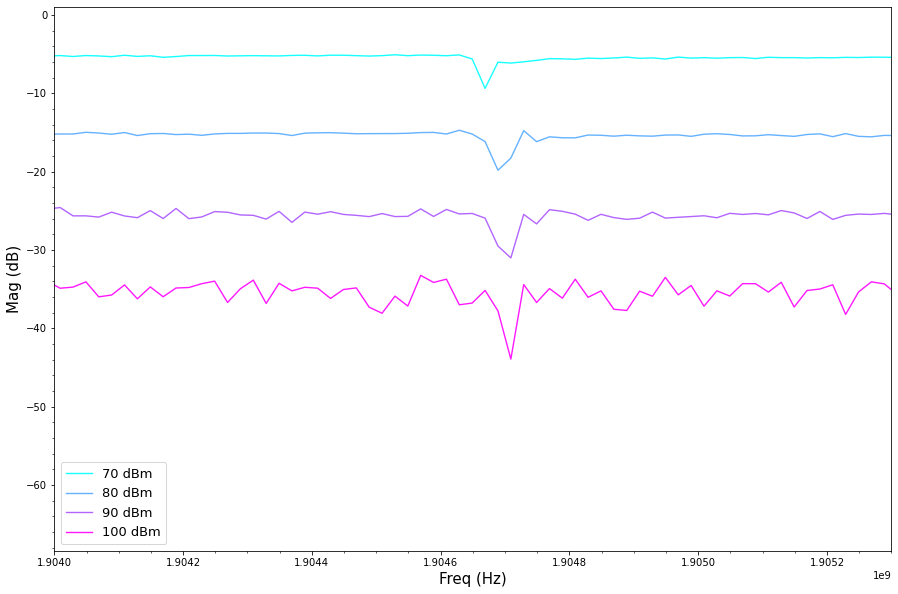

In [55]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['70 dBm', '80 dBm', '90 dBm', '100 dBm']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1.4, label=power[i], color=colores[i])
    
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(1.904e9,1.9053e9)
#plt.ylim(-50,0)

##### Resonancia 18

(1465600000.0, 1467100000.0)

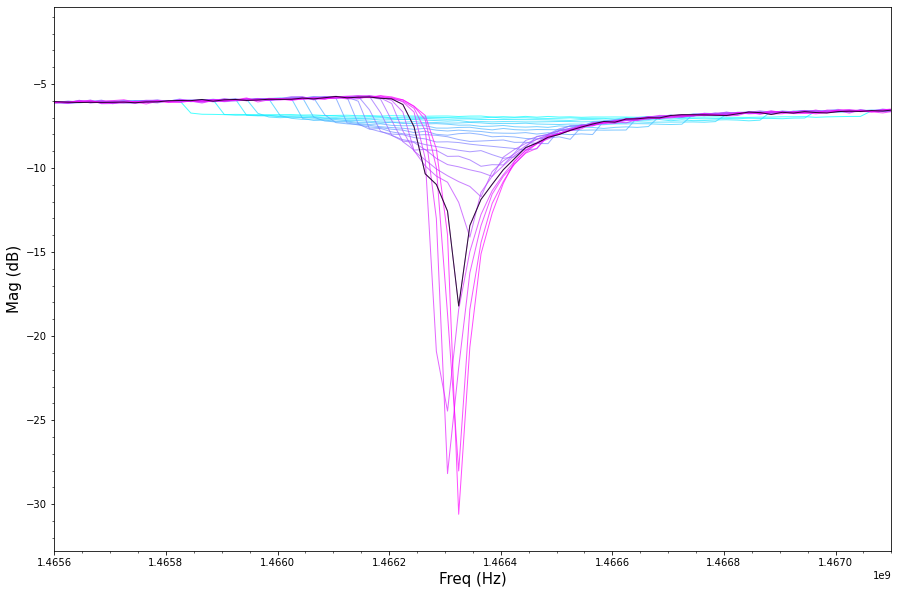

In [29]:
os.chdir(path+'\Datos\MKID\Potencia')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.7, linewidth=1, color=colores[i])
    
    
df_file = pd.read_csv(files[16])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.8, linewidth=1, color='k')
    
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(1.4656e9,1.4671e9)


(-45.0, -10.0)

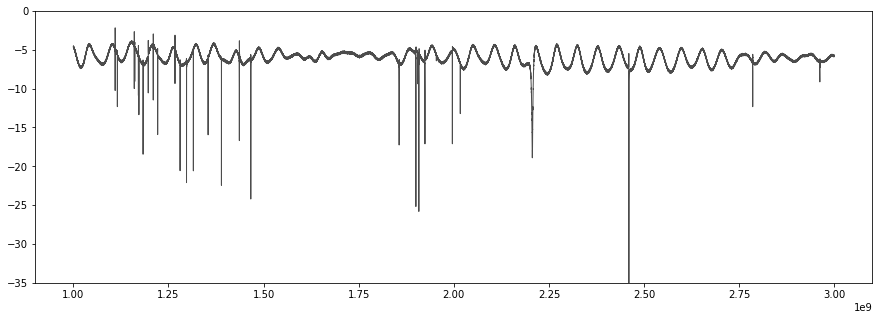

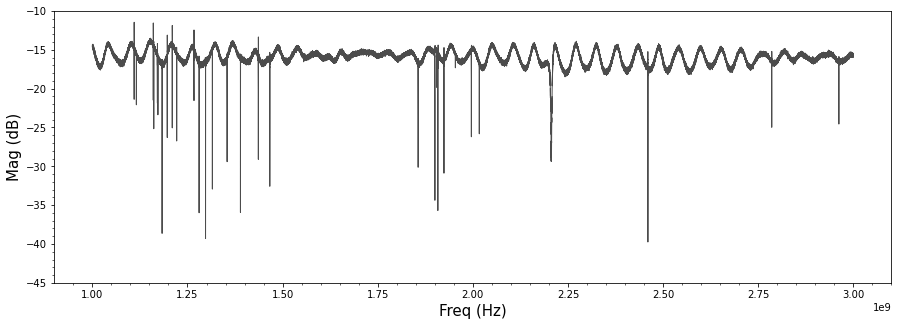

In [43]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")

norm = np.linspace(0,1,21)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 5))

df_file = pd.read_csv(files[0])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=1, color='k')
plt.ylim(-35,0)

fig, ax = plt.subplots(figsize=(15, 5))

df_file = pd.read_csv(files[1])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=1, color='k')
    
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
#plt.xlim(1.4656e9,1.4671e9)   # 18
#plt.xlim(1.904e9,1.9053e9)   # 21
#plt.xlim(2.459e9, 2.461e9)   # 28
plt.ylim(-45,-10)

(1465600000.0, 1467100000.0)

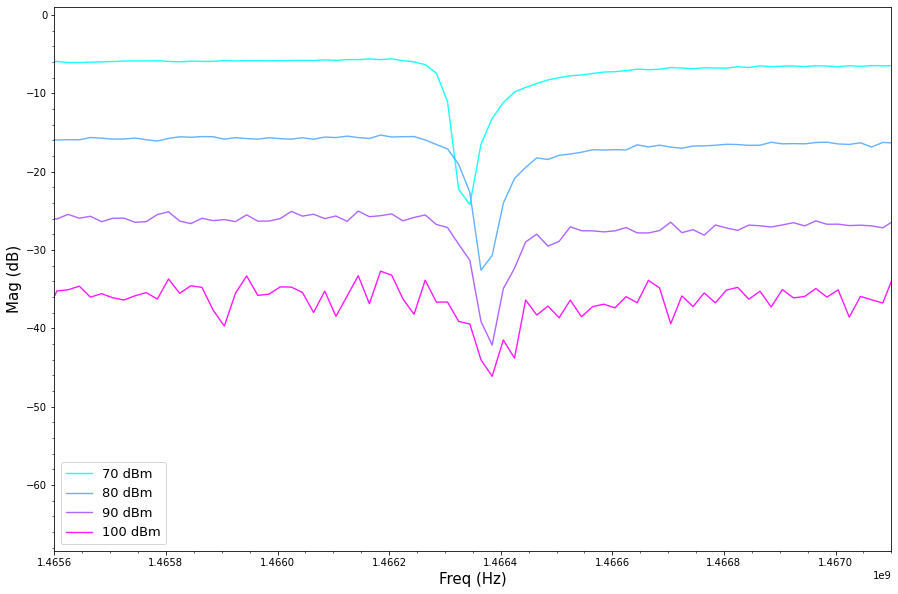

In [56]:
os.chdir(path+'\Datos\MKID\Potencia\señal-ruido')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Potencia\señal-ruido","*.csv")
power = ['70 dBm', '80 dBm', '90 dBm', '100 dBm']

norm = np.linspace(0,1,4)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("cool")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.9, linewidth=1.4, label=power[i], color=colores[i])
    
plt.legend() 
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.xlim(1.4656e9,1.4671e9)

### Temperatura

Ya he puesto todos los arhivos bien, están en MKID\Temperatura


(2459300000.0, 2461000000.0)

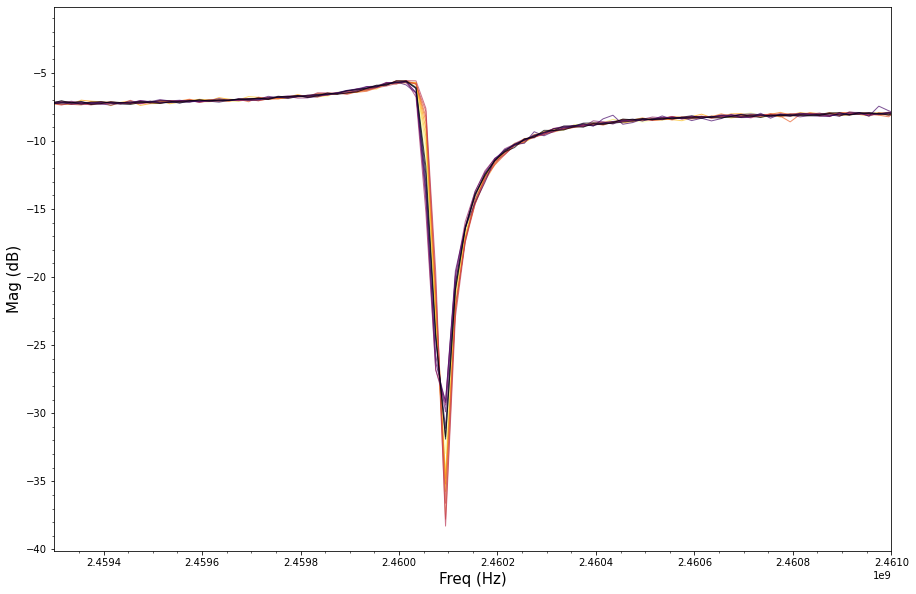

In [147]:
os.chdir(path+'\Datos\MKID\Temperatura\\23')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\23","*.csv")

norm = np.linspace(0,1,15)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.7, linewidth=1, label=files[i], color=colores[i])

plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
#plt.xlim(1.4656e9,1.4671e9)   # 18
#plt.xlim(1.904e9,1.9053e9)   # 21
plt.xlim(2.4593e9, 2.461e9)   # 28


(2455000000.0, 2461000000.0)

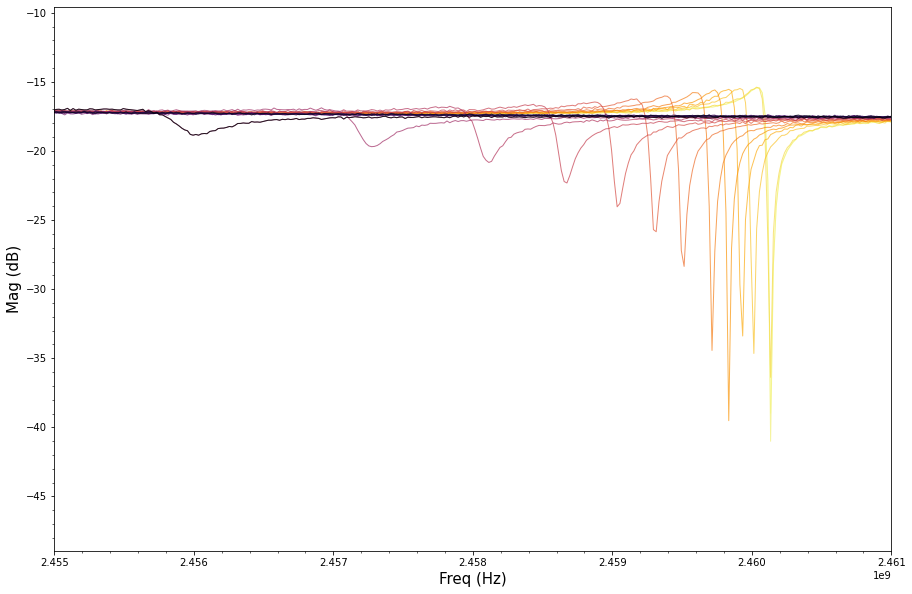

In [2]:
os.chdir(path+'\Datos\MKID\Temperatura\\24')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\24","*.csv")

norm = np.linspace(0,1,22)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 10))
for i in range(len(files)):
    file = files[i]
    df_file = pd.read_csv(file)
    
    freq = df_file.iloc[:,0].tolist()
    db = df_file.iloc[:,1].tolist()
    phase = df_file.iloc[:,2].tolist()

    plt.plot(freq,db, alpha=0.7, linewidth=1, label=files[i], color=colores[i])
    
df_file = pd.read_csv(files[13])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.8, linewidth=1, color='k')

plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
#plt.xlim(1.45e9,1.4671e9)   # 18
#plt.xlim(1.90e9,1.9048e9)   # 21
#plt.xlim(2.41e9, 2.461e9)   # 28
plt.xlim(2.455e9, 2.461e9)   # 28


(-40.0, -10.0)

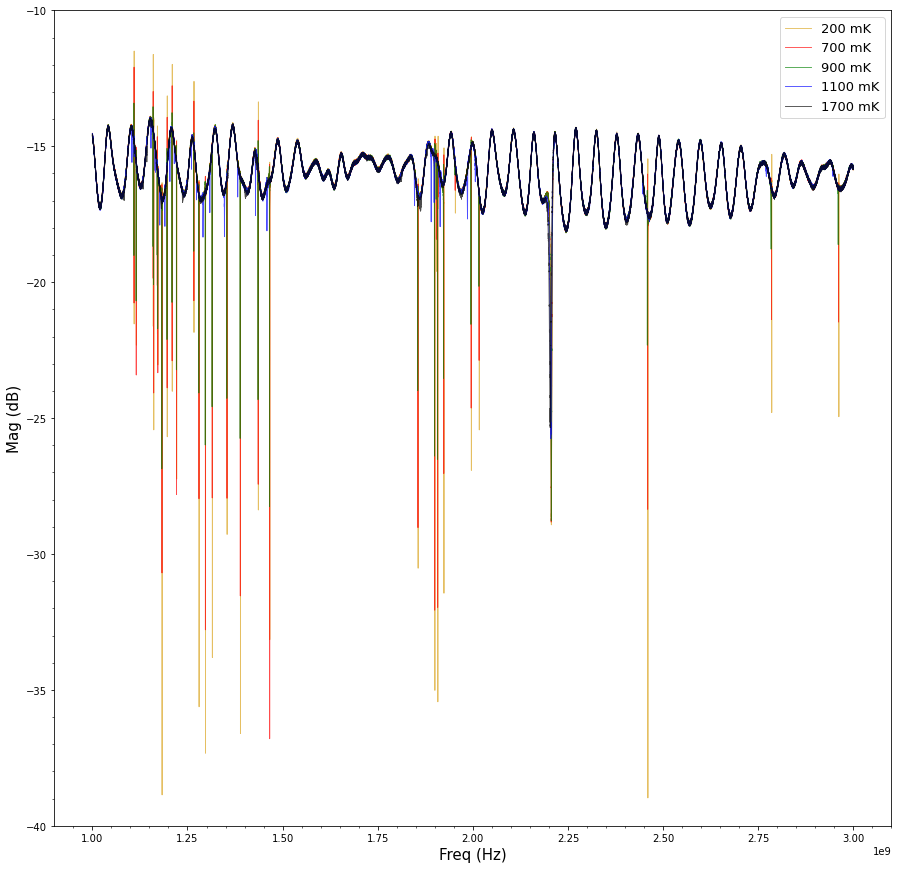

In [10]:
os.chdir(path+'\Datos\MKID\Temperatura\\24')    
os.getcwd()

files = glob.glob1(path+"\Datos\MKID\Temperatura\\24","*.csv")
legend = ['200 mK','700 mK','900 mK','1100 mK','1700 mK']
norm = np.linspace(0,1,22)
normdata=colors.Normalize(0,1)
colormap = cm.get_cmap("inferno_r")
colores = colormap(normdata(norm))

fig, ax = plt.subplots(figsize=(15, 15))

df_file = pd.read_csv(files[0])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=0.9, color='goldenrod', label=legend[0])
plt.minorticks_on()  

df_file = pd.read_csv(files[7])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=0.9, color='red', label=legend[1])
plt.minorticks_on()  

df_file = pd.read_csv(files[10])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=0.9, color='g', label=legend[2])
plt.minorticks_on()  

df_file = pd.read_csv(files[15])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=0.9, color='b', label=legend[3])
plt.minorticks_on()  


df_file = pd.read_csv(files[20])
freq = df_file.iloc[:,0].tolist()
db = df_file.iloc[:,1].tolist()
plt.plot(freq,db, alpha=0.7, linewidth=0.9, color='black', label=legend[4])

plt.legend()
plt.minorticks_on()  
plt.xlabel('Freq (Hz)')
plt.ylabel('Mag (dB)')   
plt.ylim(-40,-10)

##### Frecuencia vs temperatura

Text(0.5, 0, 'Temperatura (K)')

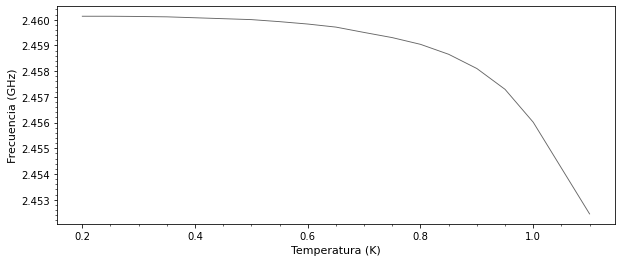

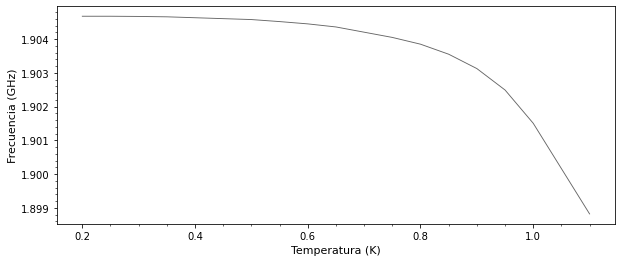

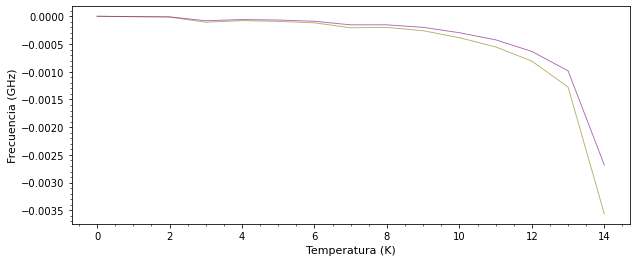

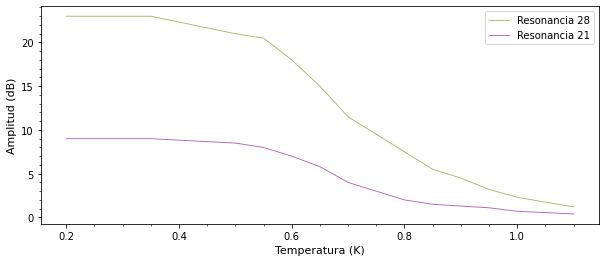

In [14]:
frec28 = np.array([2.460133,2.460133,2.460124,2.460110,2.460002,2.459923,2.459830,2.459711,2.459503,2.459302,2.459041,2.458654,2.458101,2.457292,2.456014,2.452450])
ampl28 = np.array([23.0,23.0,23.0,23.0,21.0,20.5,18.0,15.0,11.5,9.5,7.5,5.5,4.5,3.2,2.3,1.2])
temp = np.array([0.200,0.250,0.300,0.350,0.500,0.550,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000, 1.100])
delta_temp = np.delete(np.array([temp[i]-temp[i-1] for i in range(len(temp))]),0)

delta_frec28 = np.delete(np.array([frec28[i]-frec28[i-1] for i in range(len(frec28))]),0)


frec21 = np.array([1.904674,1.904674,1.904668,1.904657,1.904576,1.904516,1.904448,1.904357,1.904202,1.904047,1.903847,1.903550,1.903125,1.902491,1.901506,1.898823])
ampl21 = np.array([9.0,9.0,9.0,9.0,8.5,8.0,7.0,5.8,4.0,3.0,2.0,1.5,1.3,1.1,0.7,0.4])

delta_frec21 = np.delete(np.array([frec21[i]-frec21[i-1] for i in range(len(frec21))]),0)



plt.rcParams.update({'axes.labelsize': 11, 'axes.titlesize': 11, 
              'legend.fontsize':10, 'font.family': ['sans-serif'] })

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(temp, frec28, alpha=0.6, linewidth=0.9, color='black')
plt.minorticks_on()  
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Temperatura (K)')   

###

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(temp, frec21, alpha=0.6, linewidth=0.9, color='black')
plt.minorticks_on()  
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Temperatura (K)')   

###

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot( delta_frec28, alpha=0.6, linewidth=0.9, color='olive', label='Resonancia 28')
plt.plot( delta_frec21, alpha=0.6, linewidth=0.9, color='purple', label='Resonancia 21')
plt.minorticks_on()  
plt.ylabel('Frecuencia (GHz)')
plt.xlabel('Temperatura (K)')   

###

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(temp, ampl28, alpha=0.6, linewidth=0.9, color='olive', label='Resonancia 28')
plt.plot(temp, ampl21, alpha=0.6, linewidth=0.9, color='purple', label='Resonancia 21')
plt.minorticks_on()  
plt.legend()
plt.ylabel('Amplitud (dB)')
plt.xlabel('Temperatura (K)')   

##### Amplitud vs Temperatura

In [ ]:
ampl28 = np.array([23.0,23.0,23.0,23.0,21.0,20.5,18.0,15.0,11.5,9.5,7.5,5.5,4.5,3.2,2.3,1.2])
temp = np.array([0.200,0.250,0.300,0.350,0.500,0.550,0.600,0.650,0.700,0.750,0.800,0.850,0.900,0.950,1.000, 1.100])
ampl21 = np.array([9.0,9.0,9.0,9.0,8.5,8.0,7.0,5.8,4.0,3.0,2.0,1.5,1.3,1.1,0.7,0.4])

plt.rcParams.update({'axes.labelsize': 11, 'axes.titlesize': 11, 
              'legend.fontsize':10, 'font.family': ['sans-serif'] })

fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(temp, ampl28, alpha=0.6, linewidth=0.9, color='olive', label='Resonancia 28')
plt.plot(temp, ampl21, alpha=0.6, linewidth=0.9, color='purple', label='Resonancia 21')
plt.minorticks_on()  
plt.legend()
plt.ylabel('Amplitud (dB)')
plt.xlabel('Temperatura (K)')   